<a href="https://colab.research.google.com/github/olegariofelipe/regressao_linear_custos_medicos/blob/main/An%C3%A1lise_de_Dados_e_Regress%C3%A3o_Linear_Custos_M%C3%A9dicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE E PREDIÇÃO DE CUSTOS MÉDICOS**

__Objetivo__:

Esse projeto tem como finalidade analisar dados sobre custos médicos, os quais serão posteriormente utilizados criação de um modelo de *regressão linear multipla*.

A base de dados usada pode ser encontrada no site do [Kaggle](https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction).

__Contexto:__

A empresa ficiticia _Seguro Mais Saúde_ atua no mercado de seguros médicos, auxiliandos seus clientes financeiramente a lidar com siatuações inesperadas de questões médicas. Recentemente foi identificada dentro da empresa, a necessidade de identificar aos pandrões e prever os custos com os clientes.
A análise de dados terá como objetivo responder algumas questões de negócio que foram requisitadas pela empresa, sendo elas:

* __Qual o perfil demográfico dos segurados com maiores custos de seguro?__
* __Como o tabagismo afeta os custos de seguro em diferentes faixas etárias?__
* __Existe uma correlação entre o índice de Massa Comporal (IMC) e os custos de seguro?__
* __O número de dependentes (filhos) impacta significativamente o valor dos custos de seguro?__
* __Como o comportamento de fumar influencia os custos de seguro entre diferentes gêneros?__
* __Como os custos de seguro mudam ao longo do tempo para diferentes grupos de idade?__

Após responder essas questões será construido um modelo de regressão linear múltipla, que atenderá a necessidade da empresa de prever custos e indentificar outras questões importantes para a empresa.

## __Dicionário de dados:__

* **age:** idade
* **sex:** sexo (female: feminino, male: masculino)
* **bmi:** Índice de Massa Corporal (IMC)
* **children:** Quantidade de dependentes (filhos)
* **smoker:** Fumante (yes : sim, no : não)
* **region:** Região
* **charges:** Custos

# **1. Análise Exploratória de Dados**

In [1]:
# Bibliotecas:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Ignorando avisos das saídas:
warnings.filterwarnings('ignore')

In [3]:
# Carregando dados:
dados = pd.read_csv('medical_insurance.csv')

In [4]:
# Visualizando conteúdo e formato dos dados:
display(dados.head(), dados.shape)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(2772, 7)

In [5]:
# Informações dos dados:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


Os tipos de dados parecem estar condizentes com valores apresentados em cada coluna.

In [6]:
# Varificando valores duplicados e valores ausentes:
print(f'Dados duplicados: {dados.duplicated().sum()}')
print(f'Dados ausentes:\n{dados.isnull().sum()}')

Dados duplicados: 1435
Dados ausentes:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


A base de dados possui uma grande quantidade de valores duplicados, será necessário remover esses valores.
Em compensação, não existem valores ausentes.

In [7]:
# Excluindo linhas duplicados:
dados_unicos = dados.drop_duplicates()
dados_unicos.duplicated().sum()

0

In [8]:
#Verificando os novos dados:
dados_unicos.shape

(1337, 7)

Agora o conjunto de dados possui apenas 1337 registros e 7 colunas.

In [9]:
# Valores únicos de cada coluna:
for coluna in dados_unicos.columns:
    print(f'{coluna}:')
    print(np.sort(dados_unicos[coluna].unique()))
    print('__'*30)

age:
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
____________________________________________________________
sex:
['female' 'male']
____________________________________________________________
bmi:
[15.96  16.815 17.195 17.29  17.385 17.4   17.48  17.67  17.765 17.8
 17.86  17.955 18.05  18.3   18.335 18.5   18.6   18.715 18.905 19.
 19.095 19.19  19.3   19.475 19.57  19.8   19.855 19.95  20.045 20.1
 20.13  20.235 20.3   20.35  20.4   20.425 20.52  20.6   20.615 20.7
 20.79  20.8   20.9   21.01  21.09  21.12  21.28  21.3   21.375 21.4
 21.47  21.5   21.56  21.565 21.66  21.7   21.755 21.78  21.8   21.85
 21.89  21.945 22.    22.04  22.1   22.135 22.22  22.23  22.3   22.42
 22.515 22.6   22.61  22.705 22.77  22.8   22.88  22.895 22.99  23.
 23.085 23.1   23.18  23.2   23.21  23.275 23.3   23.32  23.37  23.4
 23.465 23.54  23.56  23.6   23.65  23.655 23.7   23.75  23.76  23.8
 23.845 23.

In [10]:
# Arredondando casas decimais das colunas charges e bmi:
dados_unicos['bmi'] = dados_unicos['bmi'].round(2)
dados_unicos['charges'] = dados_unicos['charges'].round(2)

In [11]:
# Verificando dados:
dados_unicos.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [12]:
# Descrição Estatistica:
dados_unicos.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.22,14.04,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.66,6.10,15.96,26.29,30.40,34.70,53.13
children,1337.0,1.10,1.21,0.00,0.00,1.00,2.00,5.00
charges,1337.0,13279.12,12110.36,1121.87,4746.34,9386.16,16657.72,63770.43


__Pontos importantes:__

1. __Idade (age)__:
  * Média igual a 40 anos
  * Range de 18 a 64 anos

2. __Índice de massa corporal__:
  Tendo como referência os valores a seguir:
  
  1. __Abaixo do peso:__ __bmi__ < 18.5
  2. __Peso saudável:__  18.5>= __bmi__  <25
  3. __Sobrepeso:__ 25>= __bmi__ <30
  4. __Obesidade:__ __bmi__ >= 30

  * 50% dos pacientes são obesos.
  * Em média os pacientes estão acima do peso.
  * Em torno de 25% dos pacientes estão abaixo do peso
  * Em torno de 25% dos pacientes possuem peso saudável.
3. __Quantidade de crianças (children)__:
  * Em média os pacientes possuem pelo menos 1 filho
  * A quantidade máxima de filhos é 5.
4. __Cobranças (charges)__:
  * A média de cobranças é 13,279.12
  * A mediana é de 9,386.16
  * A diferença entre a média e mediana é considerável, o que indicar uma assimetria na distribuição dos dados.
  * O range dos dados também é bastante elevado, o que pode indicar presença de _outliers_.


### **1.1. Análise dados quantitativos:**

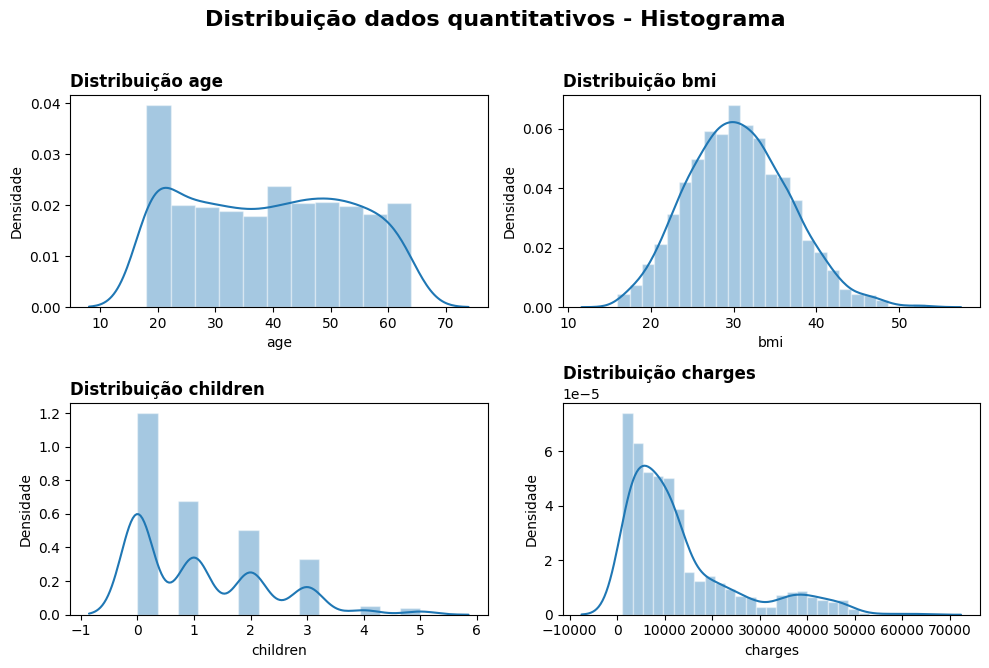

In [13]:
#Distribuição Dados numéricos:
fig, ax = plt.subplots(2, 2, figsize=(10,6.5))
fig.suptitle('Distribuição dados quantitativos - Histograma', fontweight='bold', fontsize=16, y=1.02)
sns.set_style('white')

# Iterando sobre os eixos e colunas:
for i, coluna in enumerate(dados_unicos.select_dtypes(include='number')):
  row = i // 2
  col = i % 2
  sns.distplot(dados_unicos[coluna], kde=True, ax = ax[row,col])
  ax[row, col].set_title(f'Distribuição {coluna}', loc='left', fontweight='bold')
  ax[row, col].set_xlabel(f'{coluna}')
  ax[row, col].set_ylabel('Densidade')

#Ajuste da figura:
plt.tight_layout()

#Mostrando figura:
plt.show()


__Pontos importantes:__

1. O __indice de massa corporal (BMI)__ aparenta seguir uma distribuição próxima de uma normal.
2. A __Cobrança (charges)__ possui uma assimetria a direita, indicando presença de outliers.
3. A maior parte dos pacientes não possuem filhos.

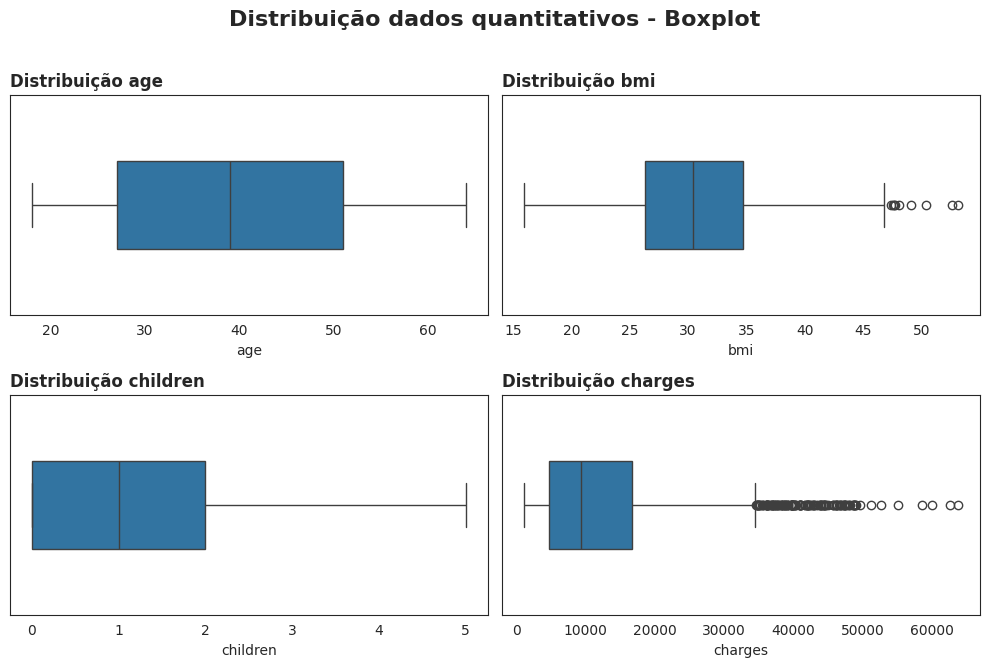

In [14]:
#Distribuição Dados numéricos:
fig, ax = plt.subplots(2, 2, figsize=(10,6.5))
fig.suptitle('Distribuição dados quantitativos - Boxplot', fontweight='bold', fontsize=16, y=1.02)

# Iterando sobre os eixos e colunas:
for i, coluna in enumerate(dados_unicos.select_dtypes(include='number')):
  row = i // 2
  col = i % 2
  sns.boxplot(dados_unicos[coluna], orient='h', ax = ax[row, col], width=0.4)
  ax[row, col].set_title(f'Distribuição {coluna}', loc='left', fontweight='bold')

#Ajuste da figura:
plt.tight_layout()

#Mostrando figura:
plt.show()

__Pontos importantes:__

1. como esperado, existem outliers na coluna __charges__ e também para a coluna __bmi__, porém em menor quantidade.

###__1.2. Lidando com outliers:__

In [15]:
# Função para identificar outliers:
def outliers(df, col):
  q1 = df[col].quantile(.25)
  q3 = df[col].quantile(.75)
  iqr = q3 - q1
  limite_inferior = q1 - 1.5 * iqr
  limite_superior = q3 + 1.5 * iqr
  outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].index
  return outliers

In [16]:
# Outliers charges:
outliers_charges = dados_unicos.iloc[outliers(dados_unicos, 'charges')]
display(outliers_charges.describe().round(2).T, outliers_charges.shape)

,count,mean,std,min,25%,50%,75%,max
age,139.0,41.18,14.09,18.00,29.00,42.00,54.00,64.00
bmi,139.0,31.93,5.59,19.95,28.11,32.30,35.88,47.41
children,139.0,1.06,1.08,0.00,0.00,1.00,2.00,4.00
charges,139.0,26146.25,17252.09,1515.34,8734.36,28468.92,41508.13,63770.43


(139, 7)

Foram encontrados um total de 139 outliers.

In [17]:
# Valores unicos de cada outlier - Charges:
np.sort(outliers_charges['charges'].unique())

array([ 1515.34,  1674.63,  1711.03,  1815.88,  2104.11,  2250.84,
        2261.57,  3208.79,  3484.33,  3594.17,  3757.84,  3925.76,
        4137.52,  4239.89,  4296.27,  4527.18,  4661.29,  4877.98,
        5630.46,  5693.43,  6117.49,  6358.78,  6500.24,  6548.2 ,
        6664.69,  7147.47,  7151.09,  7222.79,  7445.92,  7537.16,
        8023.14,  8534.67,  8547.69,  8604.48,  8703.46,  8765.25,
        9048.03,  9182.17,  9863.47,  9872.7 , 10085.85, 10264.44,
       10976.25, 11286.54, 11658.12, 11729.68, 12129.61, 12363.55,
       12609.89, 13041.92, 13555.  , 13635.64, 13844.8 , 13974.46,
       14119.62, 14254.61, 14426.07, 15161.53, 15817.99, 18648.42,
       18765.88, 18903.49, 20009.63, 20167.34, 20296.86, 20773.63,
       21259.38, 24180.93, 27533.91, 28468.92, 34779.62, 34838.87,
       35147.53, 35160.13, 35491.64, 35585.58, 36085.22, 36149.48,
       36197.7 , 36219.41, 36837.47, 36950.26, 37079.37, 37133.9 ,
       37165.16, 37701.88, 37742.58, 38126.25, 38245.59, 38282

In [18]:
# Verificando proporção de outliers em relação a base de dados:
prop = (outliers_charges.shape[0] / dados_unicos.shape[0]) * 100
print(f'Proporção = {prop:.2f}%')

Proporção = 10.40%


Como os outliers representam uma boa parcela dos dados (10,40%) e aparentemente os valores parecem ser possíveis, irei optar por não excluir esses dados.

In [19]:
# Outliers body mass index:
outliers_bmi = dados_unicos.iloc[outliers(dados_unicos, 'bmi')]
display(outliers_bmi.describe().round(2).T, outliers_bmi.shape)

,count,mean,std,min,25%,50%,75%,max
age,9.0,42.89,12.29,25.00,35.00,46.00,54.00,58.00
bmi,9.0,36.50,12.10,22.10,24.10,39.71,47.52,49.06
children,9.0,1.22,1.48,0.00,0.00,1.00,2.00,4.00
charges,9.0,15162.42,18862.46,2974.13,7151.09,9432.93,11381.33,63770.43


(9, 7)

In [20]:
# Verificando valores únicos de cada outliers:
np.sort(outliers_bmi['bmi'].unique())

array([22.1 , 22.52, 24.1 , 28.  , 39.71, 47.41, 47.52, 48.07, 49.06])

In [21]:
# Proporção outliers em relação aos dados originais:
print(f'Proporção = {np.round((outliers_bmi.shape[0] / dados_unicos.shape[0])*100, 2)}%')

Proporção = 0.67%


Aqui a proporção é bem menor, mas como os valores também são valores possíveis, irei optar por não remover esses dados.

### __1.3. Análise dados categóricos:__

In [22]:
# Distribuição dos dados categóricos:
print('PROPORÇÃO - DADOS CATEGÓRICOS\n')
for coluna in dados_unicos.select_dtypes(include='object').columns:
  print(dados_unicos[coluna].value_counts(normalize=True).round(4)*100)
  print('__'*30)

PROPORÇÃO - DADOS CATEGÓRICOS

sex
male      50.49
female    49.51
Name: proportion, dtype: float64
____________________________________________________________
smoker
no     79.51
yes    20.49
Name: proportion, dtype: float64
____________________________________________________________
region
southeast    27.23
southwest    24.31
northwest    24.23
northeast    24.23
Name: proportion, dtype: float64
____________________________________________________________


__Pontos Importantes:__

1. A Base de dados possui mais homens do que mulheres, mesmo que a diferença seja pouca.
2. A maioria dos pacientes é não fumante, cerca de 79%.
3. A região com maior número de pacientes é a região southwest, com 27,23%.

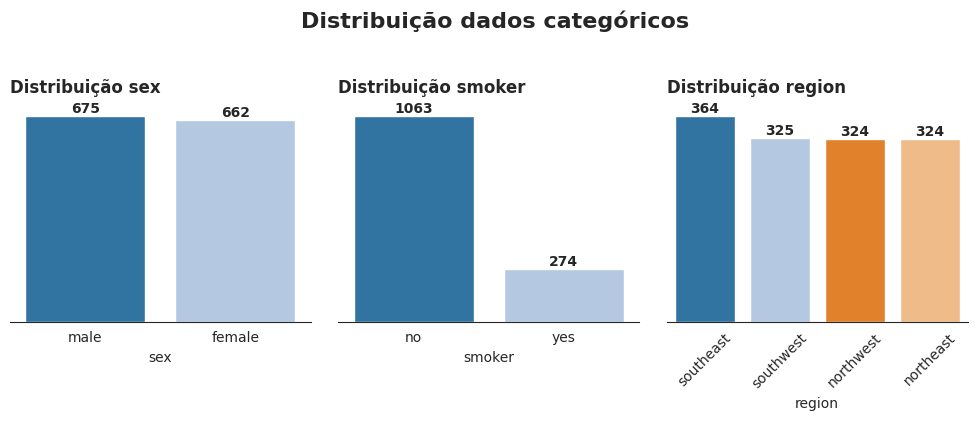

In [23]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
fig.suptitle('Distribuição dados categóricos',fontweight='bold', fontsize=16, y=1.04)
colunas = dados_unicos.select_dtypes(include='object').columns

for i, coluna in enumerate(colunas):
  df = dados_unicos[coluna].value_counts().reset_index()
  sns.barplot(data = df, x = coluna, y='count', ax = ax[i], orient='v', palette='tab20')
  ax[i].set_title(f'Distribuição {coluna}', loc='left', y=1.02, fontweight='bold')
  ax[i].set_ylabel('')
  ax[i].axes.get_yaxis().set_visible(False)
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].spines['left'].set_visible(False)
  plt.xticks(rotation=45)

  for container in ax[i].containers:
    ax[i].bar_label(container, fontweight='bold')

plt.subplots_adjust(wspace=1.5)

fig.tight_layout()
plt.show()


# **2. Questões de Negócio**

Nessa etapa, será realizada uma análise direcionada a responder as questões de interesse da empresa.

## __2.1. Qual é o perfil demográfico dos segurados com os maiores custos de seguro?__

Identificar quais faixas etárias, gêneros e regiões geográficas apresentam os maiores custos de seguro.

Para análise de custo por idade, iremos agrupar as idades em faixas etárias da seguinte forma:

* __Adolescencia:__ 18 a 20 anos;
* __Pós-Adolecência:__ 21 a 26 anos;
* __Adultidade:__ 26 a 40 anos;
* __Meia-Idade:__ 41 a 65 anos;
* __Terceira Idade:__ 66 a 80 anos;
* __Quarta Idade:__ mais de 80 anos

In [24]:
# Verificando os valores mínimo e máximo para a idade:
print(dados_unicos['age'].min(), dados_unicos['age'].max())

18 64


In [25]:
# Organizandos valores para realizar classificação dos dados:
classes = [dados_unicos['age'].min(), 21, 26, 41, dados_unicos['age'].max()]
labels = ['Adolescencia', 'Pós-Adolecência', 'Adultidade', 'Meia-Idade']

# Data frame que receberá as idade classificadas:
class_age = pd.DataFrame()

# Inserindo as colunas necessárias:
class_age['classes'] = pd.cut(x = dados_unicos['age'], bins = classes, labels = labels, include_lowest = True)
class_age['age'] = dados_unicos['age']
class_age['charges'] = dados_unicos['charges']
class_age.head()

,classes,age,charges
0,Adolescencia,19,16884.92
1,Adolescencia,18,1725.55
2,Adultidade,28,4449.46
3,Adultidade,33,21984.47
4,Adultidade,32,3866.86


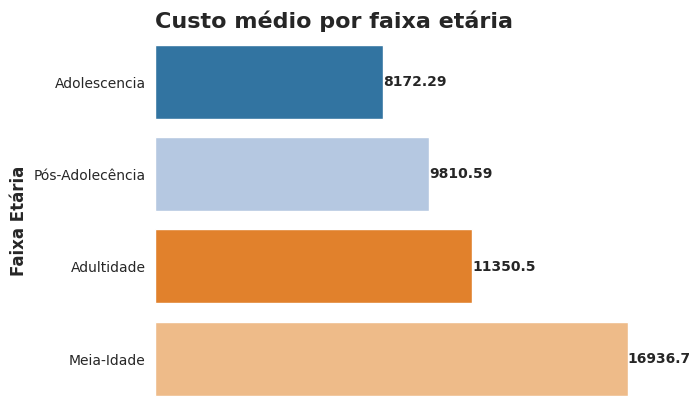

In [26]:
# Criando visualização para identificar os custos por faixa etária:

# Agrupando os custos por classe:
charges_age = class_age.groupby('classes')['charges'].mean().round(2).sort_values(ascending=False).reset_index()

# Criando e configurando gráfico:
ax = sns.barplot(data = charges_age, x = 'charges', y = 'classes', orient = 'h', palette = 'tab20')
ax.set_title('Custo médio por faixa etária', fontweight='bold', fontsize=16, loc='left')
ax.set_ylabel('Faixa Etária', fontsize=12, fontweight='bold')
ax.set_xlabel('Custos')
ax.axes.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adicionando labels de cada barra do gráfico:
for container in ax.containers:
  ax.bar_label(container, fmt = '%2g', fontweight='bold')

# Mostrando gráfico
plt.show()

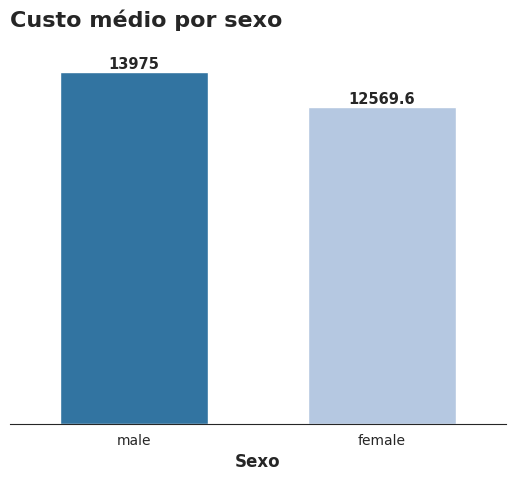

In [27]:
# Custo médio por sexo:
charges_sex = dados_unicos.groupby('sex')['charges'].mean().round(2).sort_values(ascending=False).reset_index()

# Configuração do gráfico:
ax = sns.barplot(data = charges_sex, x='sex', y='charges', width=0.6, palette='tab20')
ax.set_title('Custo médio por sexo', fontsize=16, fontweight='bold', loc='left', y=1.05)
ax.set_xlabel('Sexo', fontsize=12, fontweight='bold')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Adicionando labels das barras do gráfico
for container in ax.containers:
  ax.bar_label(container, fontweight='bold', fontsize=10.5)

# Mostrando gráfico
plt.show()

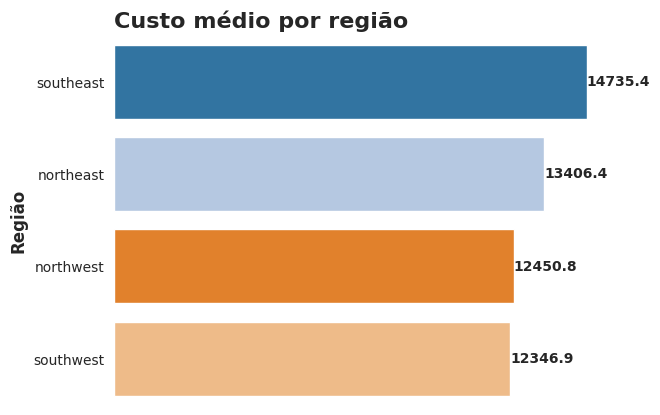

In [28]:
# Custo médio por região:

# Agrupando custos por região
charges_region = dados_unicos.groupby('region')['charges'].mean().round(2).sort_values(ascending=False).reset_index()

# Criando e configurando gráfico:
ax = sns.barplot(data = charges_region, x = 'charges', y = 'region', orient = 'h', palette='tab20')
ax.set_title('Custo médio por região', fontweight='bold', fontsize=16, loc='left')
ax.set_ylabel('Região', fontsize=12, fontweight='bold')
ax.set_xlabel('Custos')
ax.axes.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adicionando labels de cada barra do gráfico:
for container in ax.containers:
  ax.bar_label(container, fmt = '%2g', fontweight='bold')

# Mostrando gráfico
plt.show()

#### __Conclusão:__
Analisando os dados acima, vemos que o perfil demográfico dos clientes com maiores custo são:
* Pessoas do sexo Masculino;
* Pessoas de meia idade;
* Pessoas da região southeast.

## __2.2. Como o tabagismo afeta os custos de seguro em diferentes faixas etárias?__

Avaliar se o impacto do tabagismo nos custos de seguro varia significativamente conforme a idade

In [29]:
# Adicionando informações sobre fumantes:
class_age['smoker'] = dados_unicos['smoker']
class_age.head()

,classes,age,charges,smoker
0,Adolescencia,19,16884.92,yes
1,Adolescencia,18,1725.55,no
2,Adultidade,28,4449.46,no
3,Adultidade,33,21984.47,no
4,Adultidade,32,3866.86,no


In [30]:
# Realizando o cruzamento de informações:
mean_charges_smoker = pd.crosstab(index = class_age['smoker'], columns = class_age['classes'], aggfunc = 'mean', values = class_age['charges']).round(2).reset_index()
mean_charges_smoker

classes,smoker,Adolescencia,Pós-Adolecência,Adultidade,Meia-Idade
0,no,3493.91,4746.86,6479.48,12094.11
1,yes,25516.52,31003.27,29602.09,36109.96


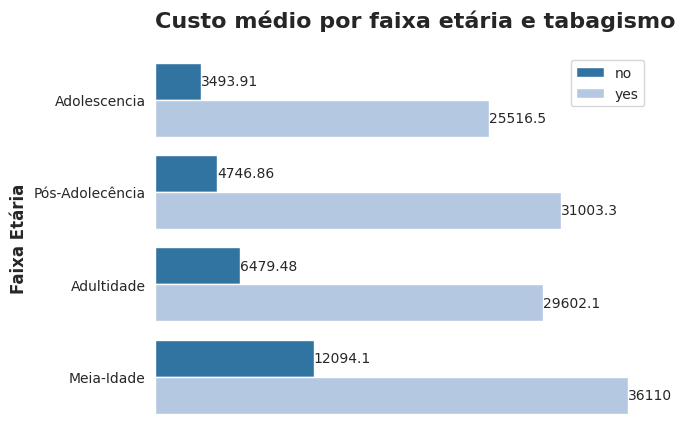

In [162]:
# Custo por faixa etária cassificado por fumantes e não fumantes:

# Criando e configurando gráfico:
ax = sns.barplot(data = class_age.sort_values(by='charges', ascending=False), palette='tab20',
                 x='charges', y='classes', hue='smoker', hue_order = ['no', 'yes'], errorbar=None)
ax.set_title('Custo médio por faixa etária e tabagismo', fontweight='bold', fontsize=16, loc='left', y=1.05)
ax.set_ylabel('Faixa Etária', fontsize=12, fontweight='bold')
ax.axes.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(loc='upper right')

# Adicionando labels de cada barra do gráfico:
for container in ax.containers:
  ax.bar_label(container)

# Mostrando Gráfico:
plt.show()

#### __Conclusão:__

O tabagismo afeta de forma significativa nos custos. É possível verificar que em todas das faixas etárias existe uma grande discrepancia de custos entre os fumantes e não fumantes.

## __2.3. Existe uma correlação entre o Índice de Massa Corporal (IMC) e os custos de seguro?__

Análise: Analisar se um IMC mais alto está associado a custos maiores de seguro e se essa correlação é linear ou não.

In [154]:
# Correlação entre o índice de massa corporal e gastos:
dados_unicos[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.198391
charges,0.198391,1.000000


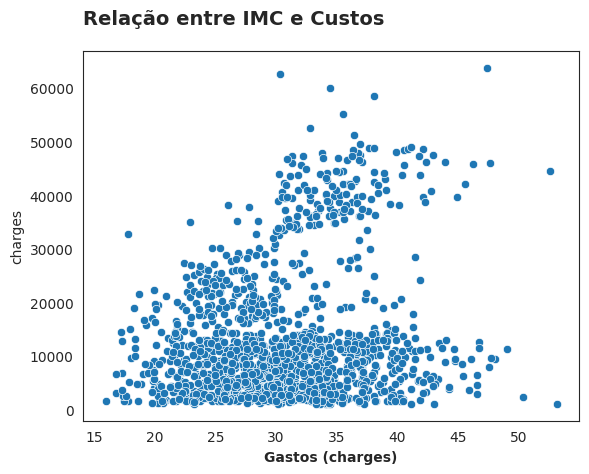

In [166]:
# Dispersão entre índice de massa corporal - IMC (bmi) e gastos (charges)

# Criação e configuração do gráfico:
ax = sns.scatterplot(x=dados_unicos['bmi'], y=dados_unicos['charges'])
ax.set_title('Relação entre IMC e Custos', fontweight='bold', fontsize=14, loc='left', y=1.05)
ax.set_xlabel('IMC (bmi)', fontweight='bold', fontsize=10)
ax.set_xlabel('Gastos (charges)', fontweight='bold', fontsize=10)
plt.show()

In [168]:
# Classificando os IMC por categoria:
classes = [dados_unicos['bmi'].min(), 18.5, 25, 30, dados_unicos['bmi'].max()]
labels = ['abaixo do peso', 'peso saudável', 'sobrepeso', 'obesidade']

# DataFrame vazio:
charges_bmi = pd.DataFrame()

# Adicionando colunas necessárias ao DataFrame:
charges_bmi['classes'] = pd.cut(x = dados_unicos['bmi'], bins = classes, labels = labels, include_lowest = True)
charges_bmi['bmi'] = dados_unicos['bmi']
charges_bmi['charges'] = dados_unicos['charges']

# Agrupando os dados em média de gastos por classe:
charges_bmi.groupby('classes')['charges'].mean().round(2).sort_values(ascending=False)

,charges
classes,
obesidade,15580.70
sobrepeso,10997.80
peso saudável,10435.44
abaixo do peso,8657.62


#### __Conclusão:__
ao que tudo indica, existe uma correlação positiva fraca entre os gastos e o IMC, visualizando a tabela acima, é possível perceber que com o aumento do IMC, a média de gastos também aumenta, sendo assim, parece haver um indicio de relação entre essas variáveis, porém é necessário uma investigação mais aprofundada.

,charges
classes,
obesidade,15580.70
sobrepeso,10997.80
peso saudável,10435.44
abaixo do peso,8657.62


## __2.4. **O** número de dependentes (filhos) impacta significativamente o valor dos custos de seguro?__

Análise: Avaliar se os custos de seguro aumentam com o número de dependentes e até que ponto.

In [98]:
# Agrupando o conjunto de dados por quantidade de dependentes
custos_por_dependentes = dados_unicos.groupby('children')['charges'].mean().round(2).reset_index()

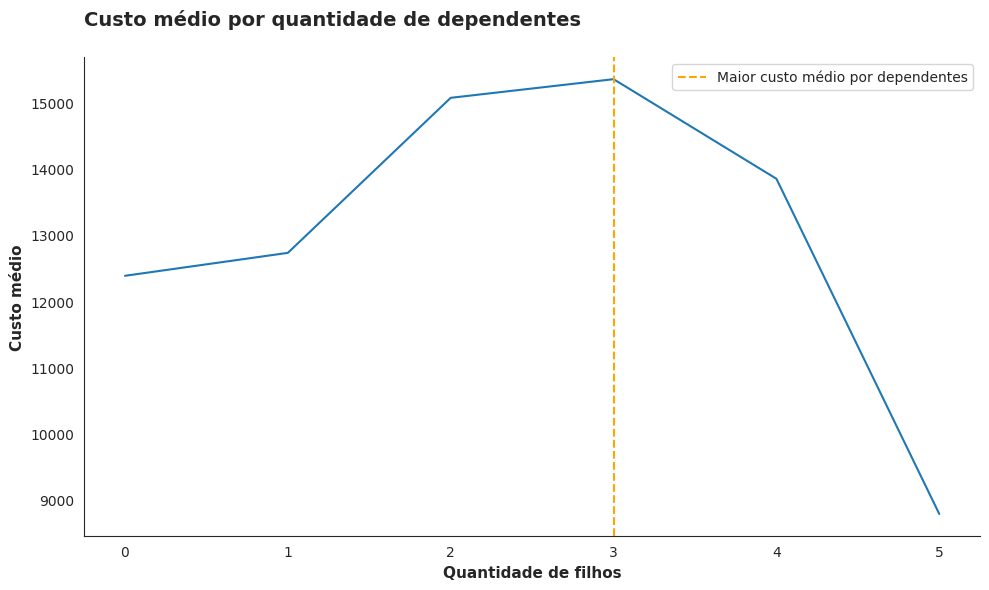

In [153]:
# Custo médio por dependentes:

# Criando e configurando gráfico:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data = custos_por_dependentes, x = 'children', y = 'charges')
ax.set_title('Custo médio por quantidade de dependentes', fontweight='bold', fontsize=14, loc='left', y= 1.05)
ax.set_xlabel('Quantidade de filhos', fontsize=11, fontweight='bold')
ax.set_ylabel('Custo médio', fontsize=11, fontweight='bold')
ax.axvline(x=3, ls = 'dashed', color = 'orange', label = 'Maior custo médio por dependentes')
ax.legend(loc = 'upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajuste do gráfico
plt.tight_layout()

# Mostrando gráfico:
plt.show()

#### __Conclusão:__
Aparentemente os custos dos segurados são influenciados pela quantidade de dependentes, sendo que os custos são mais altos para segurados com 2 a 4 filhos e menores gastos para segurados com nenhum ou 5 filhos.

## __2.5. Como o comportamento de fumar influencia os custos de seguro entre diferentes gêneros?__

Análise: Comparar como os custos de seguro variam entre homens e mulheres fumantes.

In [38]:
pd.crosstab(index = dados_unicos['sex'], columns=dados_unicos['smoker'], aggfunc='mean', values=dados_unicos['charges']).round(2)

smoker,no,yes
sex,,
female,8762.3,30679.00
male,8099.7,33042.01


## __2.6. Como os custos de seguro mudam ao longo do tempo para diferentes grupos de idade?__

Análise: Investigar se existe uma tendência nos custos conforme os clientes envelhecem e se isso varia entre diferentes grupos demográficos.

In [39]:
age_varience = dados_unicos.groupby('age')['charges'].mean().round(2).reset_index()
age_varience.head()

,age,charges
0,18,7086.22
1,19,9868.93
2,20,10159.70
3,21,4730.46
4,22,10012.93


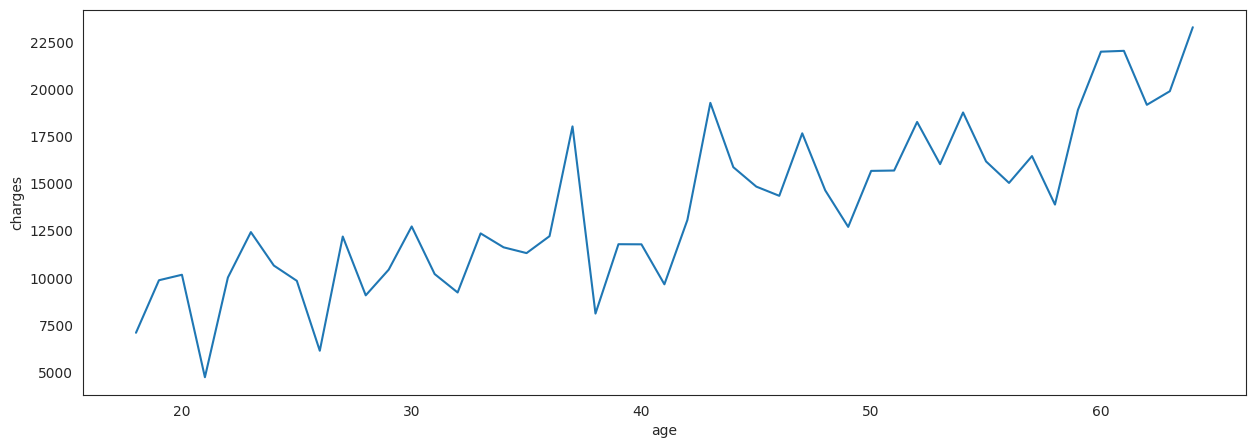

In [40]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data = age_varience, x = 'age', y = 'charges')
plt.show()

# **3. Análise de Regressão Linear**

In [41]:
# Transformação dos dados categóricos utilizando hot encoding:
dados_regressao = pd.get_dummies(dados_unicos, dtype='int')
dados_regressao.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.00,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.70,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.88,0,3866.86,0,1,1,0,0,1,0,0


Text(0.0, 1.02, 'Correlação entre variáveis')

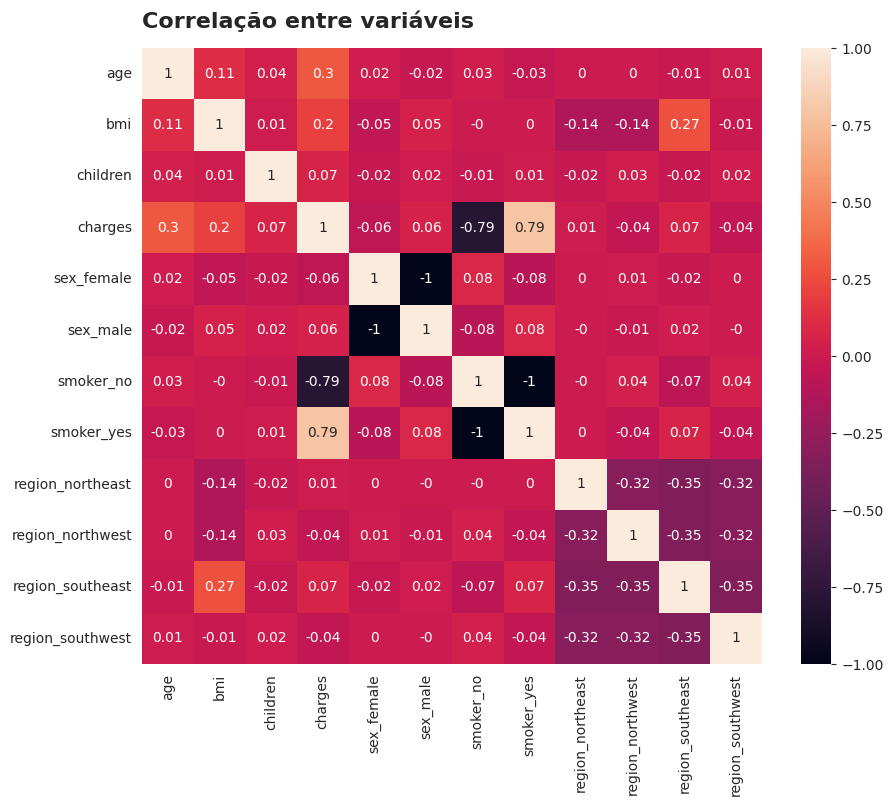

In [42]:
# Analisando correlação entre as variáveis:
plt.figure(figsize=(10,8))
ax = sns.heatmap(dados_regressao.corr().round(2), annot=True)
ax.set_title('Correlação entre variáveis', fontweight='bold', fontsize=16, loc='left', y=1.02)

Analisando a matriz de correlção, é possível perceber que existe a presença de **correlações perfeitas negativas**, indicando uma alta **multicolinearidade**.Isso pode ser explicado pela aplicação de hot encoding em colunas categóricas binárias, como as colunas originais **smoker** e **sex**. Manter essas colunas pode dificultar a interpretação dos dados e diminuir a precisão do modelo de regressão linear.

In [43]:
# Ajustando dados e colunas do DataFrame:
dados_regressao.drop(columns=['sex_female','smoker_no'], axis=1, inplace=True)
dados_regressao.rename({'sex_male':'sex','smoker_yes':'smoker'}, axis=1, inplace=True)
dados_regressao.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.92,0,1,0,0,0,1
1,18,33.77,1,1725.55,1,0,0,0,1,0
2,28,33.00,3,4449.46,1,0,0,0,1,0
3,33,22.70,0,21984.47,1,0,0,1,0,0
4,32,28.88,0,3866.86,1,0,0,1,0,0


Agora possuimos novamente apenas as colunas originais __sex__ e __smoker__ para representar os dados, sendo:

|Valor|Sex|Smoker|
|---|---|---|
| 0 | female | no |
| 1 | male | yes |

Text(0.0, 1.02, 'Correlação entre variáveis')

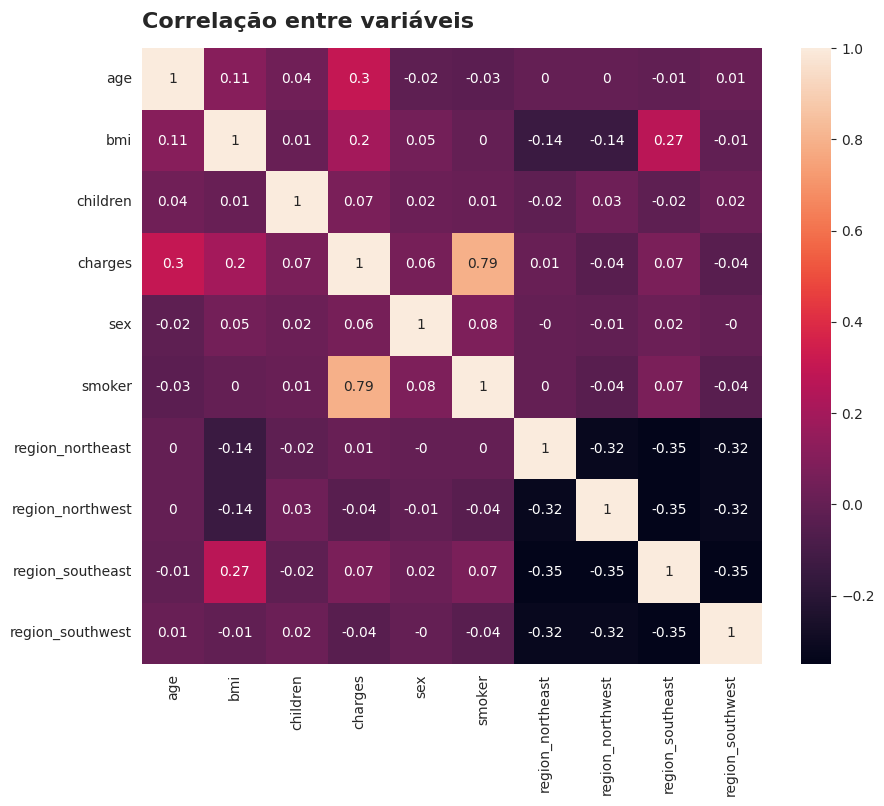

In [44]:
# Analisando correlação entre as variáveis:
plt.figure(figsize=(10,8))
ax = sns.heatmap(dados_regressao.corr().round(2), annot=True)
ax.set_title('Correlação entre variáveis', fontweight='bold', fontsize=16, loc='left', y=1.02)

In [45]:
# Analisando correlação entre as variáveis em relação ao custo:
dados_regressao.corr()['charges'].round(2).to_frame().sort_values(by='charges', ascending=False).style.background_gradient(cmap='magma')

,charges
charges,1.000000
smoker,0.790000
age,0.300000
bmi,0.200000
children,0.070000
region_southeast,0.070000
sex,0.060000
region_northeast,0.010000
region_northwest,-0.040000
region_southwest,-0.040000


Analisando a matriz acima, é possível perceber que existe uma forte correlação da variável __charges__ com as seguintes variáveis:

* __smoker__ (0.79): O que era algo esperado, uma vez que o tabagismo está relacionado a diversos problemas de saúde.
* __age__ (0.3): Também era algo esperado, pois com o aumento da idade, prevalece o aumento de problemas de saúde.
* __bmi__ (0.2): Também era esperado, pois pessoas acima do peso, tendem a desenvolver diversos problemas de saúde crônicos.
* __children__ (0.07): Ainda que baixa, a quantidade de filhos parece influenciar nos custos.
* __region_southeast__ (0.07): parece que os custos para os segurados dessa região tendem a serem mais caros em comparação com as demais regiões.


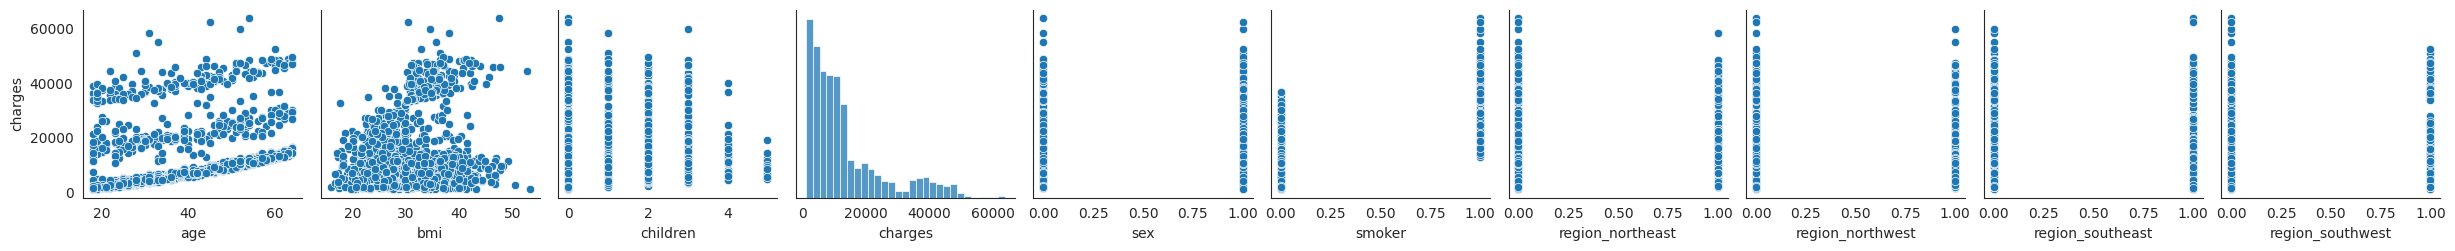

In [46]:
# Anlise de distribuição entre as variáveis:
ax = sns.pairplot(data = dados_regressao,
                  x_vars=dados_regressao.columns,
                  y_vars = 'charges')

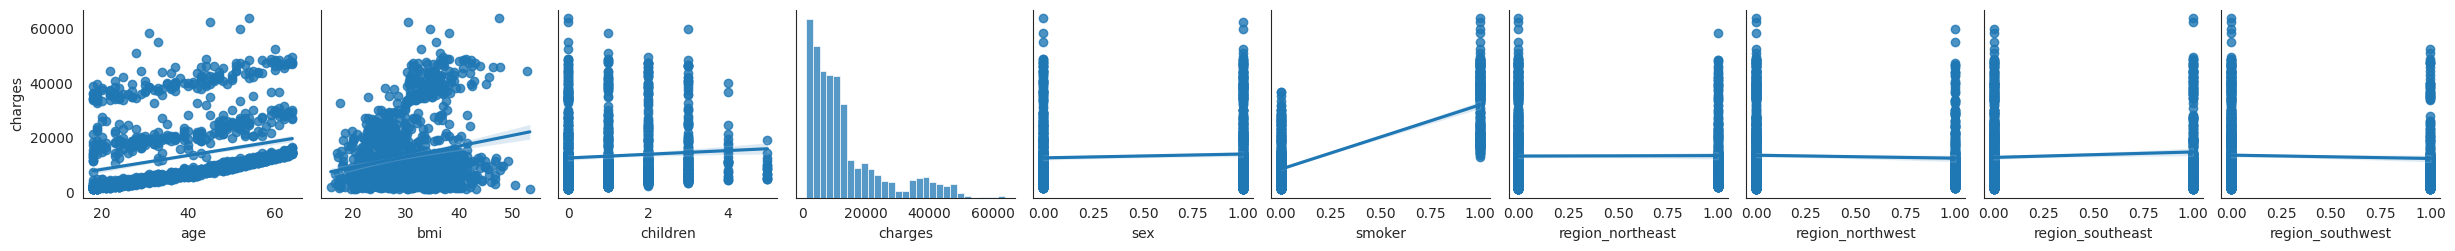

In [47]:
# Anlise de distribuição entre as variáveis com linha de regressão:
ax = sns.pairplot(data = dados_regressao,
                  x_vars=dados_regressao.columns,
                  y_vars = 'charges',
                  kind = 'reg')

__Criando modelo de Regressão Linear usando o Stasmodels__

In [48]:
# Importando bibliotecas necessárias:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [49]:
# Separando conjunto de dados:
X = dados_regressao.drop('charges', axis=1)
y = dados_regressao['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(935, 9)

(402, 9)

(935,)

(402,)

In [50]:
# Treinamento e análise do modelo com dados de treino:
X_train_com_constante = sm.add_constant(X_train)
modelo = sm.OLS(y_train, X_train_com_constante).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     323.1
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          6.74e-262
Time:                        16:56:37   Log-Likelihood:                -9458.3
No. Observations:                 935   AIC:                         1.893e+04
Df Residuals:                     926   BIC:                         1.898e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9646.9776    938.427  

__Avaliando o Modelo com dados de treino:__

__Análise Geral:__
O modelo como um todo demostra ser bastante significativo, indicando que as variáveis independentes utilizadas explicam a variação dos custos em em certa de 73%.

__Análise de Coeficientes:__ De modo geral, os coeficientes utilizados possuem significancia para o modelo, com excessão da variável _sex_.
Abaixo podemos ver a variação do custo para variável a cada 1 unidade, mantendo os demais valores constantes.
* __age__:         248.21
* __bmi__:         318.70
* __children__:    532.00
* __sex__:        -101.56 (não possui significância)
* __smoker__:      23850.00
* __region_northeast__: -1840.48
* __region_northwest__: -2232.55
* __region_southeast__ :-2679.40
* __region_southwest__: -2499.63

__Ajustando e Reavaliando estatisticas de teste do modelo:__

In [51]:
X2 = dados_regressao.drop(columns=['sex','charges'], axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=.3, random_state=42)

X_train_com_constante2 = sm.add_constant(X_train2)
modelo2 = sm.OLS(y_train, X_train_com_constante2).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     369.7
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          3.52e-263
Time:                        16:56:37   Log-Likelihood:                -9458.4
No. Observations:                 935   AIC:                         1.893e+04
Df Residuals:                     927   BIC:                         1.897e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9679.0829    931.070  

Removendo a variável sex, o modelo de modo geral obteve uma melhora em significância, mesmo que o R² tenha permanecido o mesmo.



# **4. Costrução de Modelo de Regressão Linear com SciKitLearn**

__Estimando modelo com dados de treino:__

In [52]:
# Importação de pacotes necessários:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [53]:
# Instanciando modelo:
modelo_skl = LinearRegression()

In [54]:
# Divisao dos dados:
X = dados_regressao.drop(['charges','sex'], axis=1)
y = dados_regressao['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(935, 8)

(402, 8)

(935,)

(402,)

In [55]:
# Treinando modelo:
modelo_skl.fit(X_train, y_train)

LinearRegression()

In [56]:
# Obtendo R² para os dados de treino:
print(f'R² = {modelo_skl.score(X_train, y_train):.2f}')

R² = 0.74


In [57]:
# Realizando previsões para dados de treino:
y_previsto = modelo_skl.predict(X_test)

In [58]:
# Obtendo R² para os dados de teste:
print(f'R² = {r2_score(y_test, y_previsto):.2f}')

R² = 0.77


### Gerando previsões para os dados de treino:


In [59]:
y_previsto_treino = modelo_skl.predict(X_train)

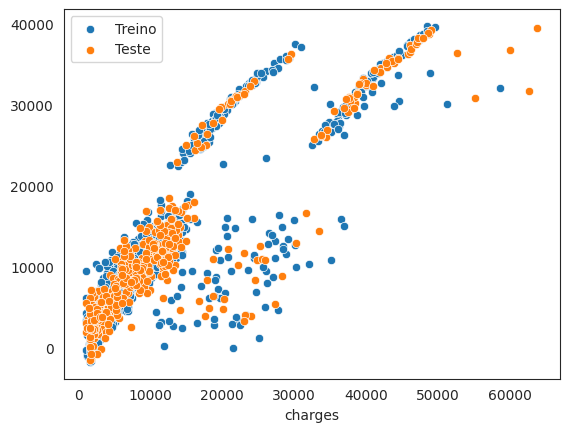

In [60]:
ax = sns.scatterplot(x=y_train, y=y_previsto_treino, label='Treino')
ax = sns.scatterplot(x=y_test, y=y_previsto, label='Teste')

__Analisando residuos:__

<Axes: xlabel='charges', ylabel='Count'>

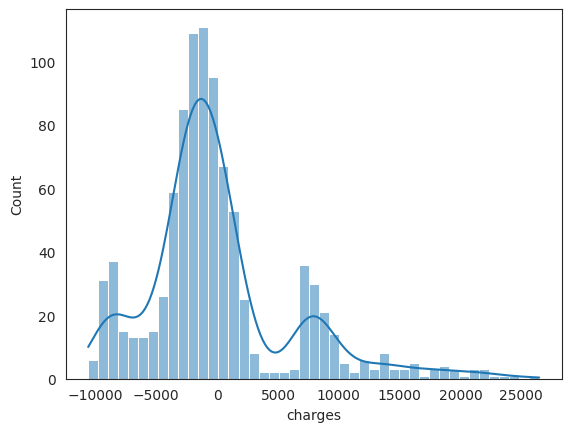

In [61]:
residuos = y_train - y_previsto_treino
sns.histplot(residuos, kde=True)